In [1]:
import pandas as pd
import numpy as np
import random as rnd
import re

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("C:/Users/xiaoxiaojun/Desktop/kaggle-titanic/train.csv")
test=pd.read_csv("C:/Users/xiaoxiaojun/Desktop/kaggle-titanic/test.csv")
full_data=[train,test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


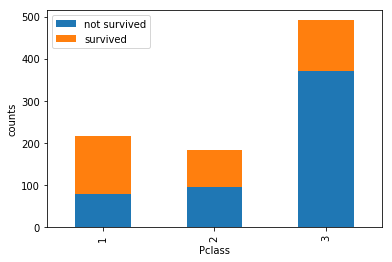

In [7]:
fig=plt.figure()
fig.set(alpha=0.2)
survived_0=train.Pclass[train.Survived==0].value_counts()
survived_1=train.Pclass[train.Survived==1].value_counts()
df=pd.DataFrame({'survived':survived_1,u'not survived':survived_0})
df.plot(kind="bar",stacked=True)
plt.xlabel(u"Pclass")
plt.ylabel(u"counts")
plt.show()


In [8]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


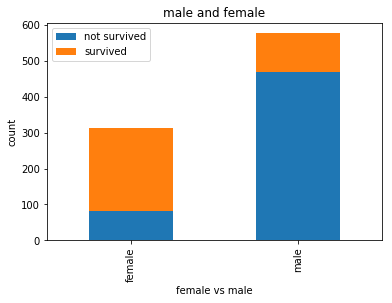

In [9]:
fig=plt.figure()
fig.set(alpha=0.2)
survived_0=train.Sex[train.Survived==0].value_counts()
survived_1=train.Sex[train.Survived==1].value_counts()
df=pd.DataFrame({'survived':survived_1,u'not survived':survived_0})
df.plot(kind="bar",stacked=True)
plt.title(u"male and female")
plt.xlabel(u"female vs male")
plt.ylabel(u"count")
plt.show()

C:\Users\xiaoxiaojun\Anaconda2\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


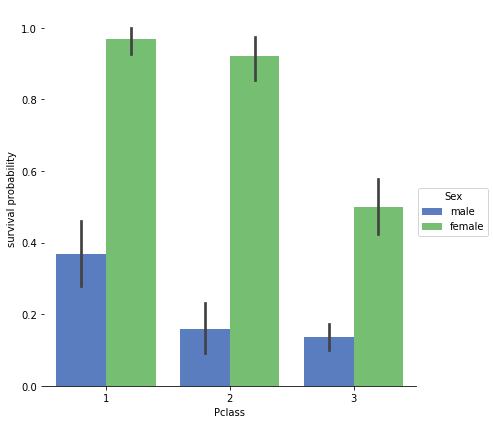

In [10]:
g=sns.factorplot(x="Pclass",y="Survived",hue="Sex",data=train,size=6,
                kind="bar",palette="muted")
g.despine(left=True)
g=g.set_ylabels("survival probability")
plt.show()

In [11]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


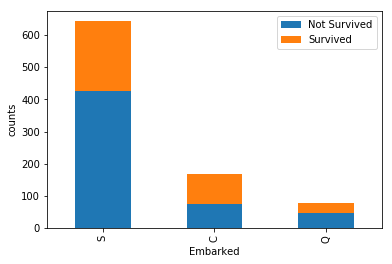

In [12]:
fig=plt.figure()
fig.set(alpha=0)
Survived_0=train.Embarked[train.Survived==0].value_counts()
Survived_1=train.Embarked[train.Survived==1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1,u'Not Survived':Survived_0})
df.plot(kind="bar",stacked=True)
plt.xlabel(u'Embarked')
plt.ylabel(u'counts')
plt.show()

In [13]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Pclass:一等舱的生化率（>60%），三等舱的生化率最低。

Sex:女性的生化率约为74%，远远大于男性生还率。

Embarked:上岸港口的不同对生化率几乎没什么影响。

SibSp and Parch:有兄弟姐妹或配偶（约25%）一起，有父母/孩子（<25%）一起在船上的乘客占比较小。Parch=1,2,3相较parch=5,6的乘客有更高的生还率。SibSP=1,2的相较SibSp=3,4有更高的生还率。

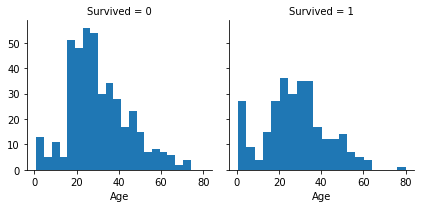

In [15]:
#Age
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)
plt.show()

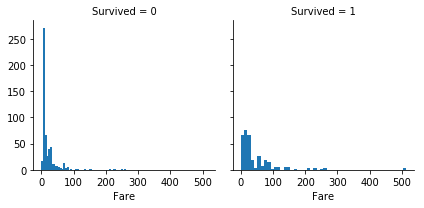

In [16]:
#Fare
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Fare',bins=50)
plt.show()

In [17]:
#填写Cabin标记为1，未填写Cabin的标记为0
#train['Has_Cabin']=train["Cabin"].apply(lambda x:0 if type(x)==float else 1)
#test['Has_Cabin']=test['Cabin'].apply(lambda x:0 if type(x)==float else 1)

In [18]:
#train[['Has_Cabin', 'Survived']].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)


In [19]:
#用众数S填充上岸港口
for dataset in full_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [20]:
#上岸港口映射为0,1,2
for dataset in full_data:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [21]:
#性别映射为0,1
for dataset in full_data:
    dataset['Sex']=dataset['Sex'].map({'female':0,'male':1}).astype(int)

In [22]:
#用中位数填充Fare
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)
    
train['CategoricalFare']=pd.qcut(train['Fare'],4)

In [23]:
train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean().sort_values(by='CategoricalFare', ascending=False)


,CategoricalFare,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [24]:
#fare 映射到0-4
for dataset in full_data:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.54),'Fare']=1
    dataset.loc[(dataset['Fare']>14.54)&(dataset['Fare']<=31),'Fare']=2
    dataset.loc[dataset['Fare']>31,'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)

In [25]:
#提取name的称谓
def get_title(name):
    title_search=re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""

In [26]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [27]:
for dataset in full_data:
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Mr')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

C:\Users\xiaoxiaojun\Anaconda2\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


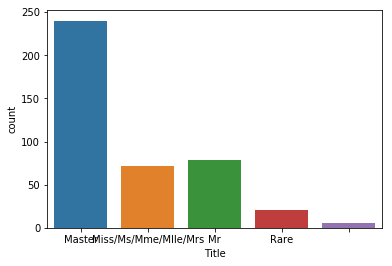

In [28]:
g = sns.countplot(dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])
plt.show()

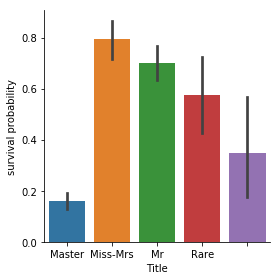

In [29]:
g = sns.factorplot(x="Title",y="Survived",data=train,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")
plt.show()

In [30]:
#Title映射到1-5
for dataset in full_data:
    title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

In [31]:
train['Name_length']=train['Name'].apply(len)
test['Name_length']=test['Name'].apply(len)

In [32]:
bins=[0,20,40,57,85]
group_names=['short','okey','good','long']
train['NlengthD']=pd.cut(train['Name_length'],bins,labels=group_names)
test['NlengthD']=pd.cut(test['Name_length'],bins,labels=group_names)


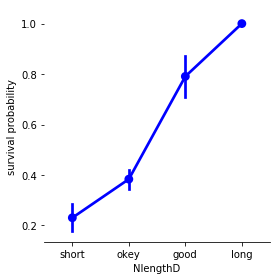

In [33]:
g=sns.factorplot(x='NlengthD',y='Survived',data=train,color="blue")
g.despine(left=True)
g=g.set_ylabels("survival probability")
plt.show()

In [34]:
for dataset in full_data:
    dataset['NlengthD']=dataset['NlengthD'].map({'short':0,'okey':1,'good':2,'long':3}).astype(int)

In [35]:
#family size
for dataset in full_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

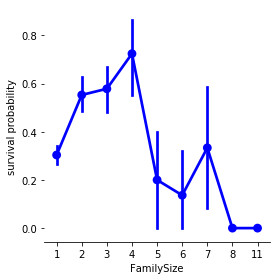

In [36]:
g=sns.factorplot(x='FamilySize',y='Survived',data=train,color="blue")
g.despine(left=True)
g=g.set_ylabels("survival probability")
plt.show()

In [37]:
#IsAlone
for dataset in full_data:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1


In [38]:
Mr_age_mean=(train[train.Name.str.contains('Mr.')]['Age'].mean())
Mrs_age_mean=(train[train.Name.str.contains('Mrs.')]['Age'].mean())
Miss_age_mean=(train[train.Name.str.contains('Miss.')]['Age'].mean())
Master_age_mean=(train[train.Name.str.contains('Master.')]['Age'].mean())

In [39]:
train.loc[(train['Name'].str.contains('Dr.'))&train.Age.isnull(),'Age']=Mr_age_mean
train.loc[(train['Name'].str.contains('Mr.'))&train.Age.isnull(),'Age']=Mr_age_mean
train.loc[(train['Name'].str.contains('Mrs.'))&train.Age.isnull(),'Age']=Mrs_age_mean
train.loc[(train['Name'].str.contains('Miss.'))&train.Age.isnull(),'Age']=Miss_age_mean
train.loc[(train['Name'].str.contains('Master.'))&train.Age.isnull(),'Age']=Master_age_mean



In [40]:
test.loc[(test['Name'].str.contains('Dr.'))&test.Age.isnull(),'Age']=Mr_age_mean
test.loc[(test['Name'].str.contains('Mr.'))&test.Age.isnull(),'Age']=Mr_age_mean
test.loc[(test['Name'].str.contains('Mrs.'))&test.Age.isnull(),'Age']=Mrs_age_mean
test.loc[(test['Name'].str.contains('Miss.'))&test.Age.isnull(),'Age']=Miss_age_mean
test.loc[(test['Name'].str.contains('Master.'))&test.Age.isnull(),'Age']=Master_age_mean




In [41]:
train['CategoricaAge']=pd.cut(train['Age'],5)

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,NlengthD,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,0,NaN,2,1,16,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,0,NaN,0,3,32,1,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,1,NaN,2,1,25,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,1,NaN,0,1,16,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,1,NaN,0,3,44,2,3,0


In [43]:
for dataset in full_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age']= 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']= 4

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,Title,Name_length,NlengthD,FamilySize,IsAlone,CategoricaAge
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0,NaN,0,"(-0.001, 7.91]",1,23,1,2,0,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,3,C85,1,"(31.0, 512.329]",3,51,2,2,0,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,1,NaN,0,"(7.91, 14.454]",2,22,1,1,1,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,3,C123,0,"(31.0, 512.329]",3,44,2,2,0,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,1,NaN,0,"(7.91, 14.454]",1,24,1,1,1,"(32.252, 48.168]"


In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_length,NlengthD,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,2.0,0,0,330911,0,NaN,2,1,16,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,363272,0,NaN,0,3,32,1,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,240276,1,NaN,2,1,25,1,1,1
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,315154,1,NaN,0,1,16,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,3101298,1,NaN,0,3,44,2,3,0


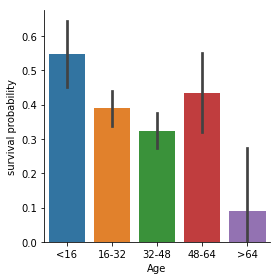

In [46]:
g = sns.factorplot(x="Age",y="Survived",data=train,kind="bar")
g = g.set_xticklabels(["<16","16-32","32-48","48-64",">64"])
g = g.set_ylabels("survival probability")
plt.show()

In [47]:
#train=train.values
#test=test.values

In [48]:
train_df=train[['Survived','Pclass','Age','Fare','Sex','Title','FamilySize','IsAlone','NlengthD']]


In [49]:
test_df=test[['Pclass','Age','Fare','Sex','Title','FamilySize','IsAlone','NlengthD']]


In [50]:
train_df.head()


,Survived,Pclass,Age,Fare,Sex,Title,FamilySize,IsAlone,NlengthD
0,0,3,1.0,0,1,1,2,0,1
1,1,1,2.0,3,0,3,2,0,2
2,1,3,1.0,1,0,2,1,1,1
3,1,1,2.0,3,0,3,2,0,2
4,0,3,2.0,1,1,1,1,1,1


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null int32
Sex           891 non-null int32
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
NlengthD      891 non-null int32
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB


In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Age           417 non-null float64
Fare          418 non-null int32
Sex           418 non-null int32
Title         418 non-null int64
FamilySize    418 non-null int64
IsAlone       418 non-null int64
NlengthD      418 non-null int32
dtypes: float64(1), int32(3), int64(4)
memory usage: 21.3 KB


In [74]:
test_df["Age"].isnull().sum()

1

In [79]:
test_df["Age"] = test_df["Age"].fillna(2.0)

C:\Users\xiaoxiaojun\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Age           418 non-null float64
Fare          418 non-null int32
Sex           418 non-null int32
Title         418 non-null int64
FamilySize    418 non-null int64
IsAlone       418 non-null int64
NlengthD      418 non-null int32
dtypes: float64(1), int32(3), int64(4)
memory usage: 21.3 KB


classifier comparison

In [81]:
import matplotlib.pyplot as plt

import seaborn as sns # Seaborn其实是在matplotlib的基础上进行了更高级的API封装

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss,f1_score

#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


In [54]:
X_train=train_df.drop("Survived",axis=1)
y_train=train_df["Survived"]
X_train.shape,y_train.shape,test_df.shape

((891, 8), (891L,), (418, 8))

In [55]:
kfold = StratifiedKFold(n_splits=10)

In [56]:
# Modeling step Test differents algorithms 
classifiers = []
classifiers.append(SVC(random_state=42))
classifiers.append(DecisionTreeClassifier(random_state=42))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=42),random_state=42,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=42))
classifiers.append(ExtraTreesClassifier(random_state=42))
classifiers.append(GradientBoostingClassifier(random_state=42))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state =42))


cv_results = []                                              
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","KNeighboors","LogisticRegression"]})

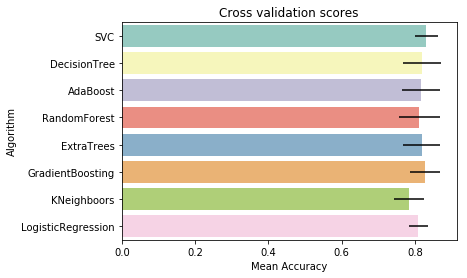

In [57]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

使用SVC，DecisionTree,RandomForset,GradientBoosting,LogisticRegression.

In [58]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

# Best 
SVMC_best=gsSVMC.best_estimator_
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   32.6s finished


0.83164983164983164

In [59]:
# decision tree
dec=DecisionTreeClassifier()
dec_param_grid={"max_features":[1,3,7,'auto'],
               "min_samples_split":[2,3,10],
               "min_samples_leaf":[2,4,8],
                "criterion":['entropy','gini']
               }
dec=GridSearchCV(dec,dec_param_grid,cv=kfold,scoring="accuracy",
                n_jobs=3,verbose=1)
dec.fit(X_train,y_train)

dec_best=dec.best_estimator_
dec.best_score_


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Done 239 tasks      | elapsed:    8.8s
[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed:    9.7s finished


0.82940516273849607

In [60]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3,'auto'],
              "min_samples_split": [2, 4,12,16],
              "min_samples_leaf": [1, 5, 10],
              "n_estimators" :[100,300,500,700],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
print (gsRFC.best_score_)
print (gsRFC.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 13.8min finished


0.841750841751
{'min_samples_leaf': 5, 'n_estimators': 500, 'min_samples_split': 16, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}


In [61]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   30.3s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   43.2s finished


0.81705948372615034

In [62]:
#logistic regression


logi = LogisticRegression()
logi_param_grid = {'penalty' : ["l1","l2"],
              'tol' : [1e-4,1e-5],
              'C':[1,5,10,100,150]
              }

gslogi = GridSearchCV(logi,param_grid = logi_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gslogi.fit(X_train,y_train)

logi_best = gslogi.best_estimator_
gslogi.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    6.3s finished


0.81144781144781142

plot learning curves

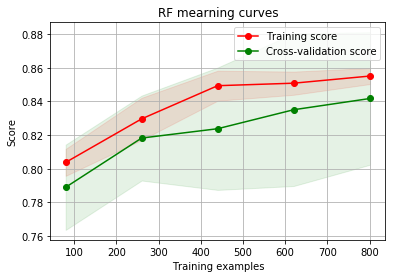

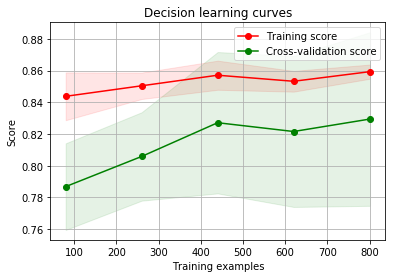

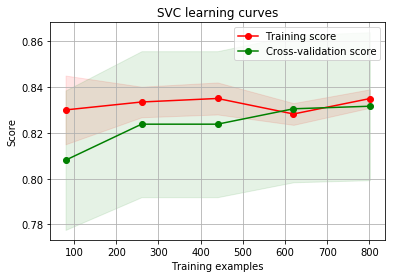

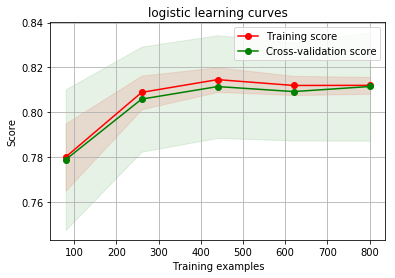

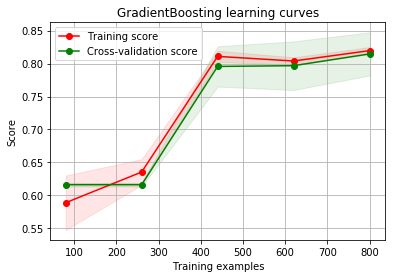

In [63]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(dec.best_estimator_,"Decision learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gslogi.best_estimator_,"logistic learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)
plt.show()

Ensemble modeling

In [64]:


#test_df=test.drop(['Name','Ticket','Cabin','SibSp','Parch','FamilySize','Name_length'],axis=1)
#test_df.info()

In [86]:

ids = test['PassengerId']
#votingC = VotingClassifier(estimators=[('RFC',RFC_best),
#('svc', SVMC_best), ('logi',logi_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

#votingC = votingC.fit(X_train, y_train)


#predictions=votingC.predict(test_df)


#output=pd.DataFrame({'PassengerId':ids,'Survived':predictions})
#output.to_csv('submission_6.csv',index=False)

In [87]:
pred=gsRFC.predict(test_df)
output=pd.DataFrame({'PassengerId':ids,'Survived':pred})
output.to_csv('submission_6.csv',index=False)